In [1]:
using PyPlot
using Seaborn

In [12]:
include("src\\NGSIM.jl")

find_pairs

In [3]:
td = load_trajdata(1)
(S, id_lookup) = td_sparse(td);

## Find Pairs

In [13]:
pair_traj = find_pairs(S);

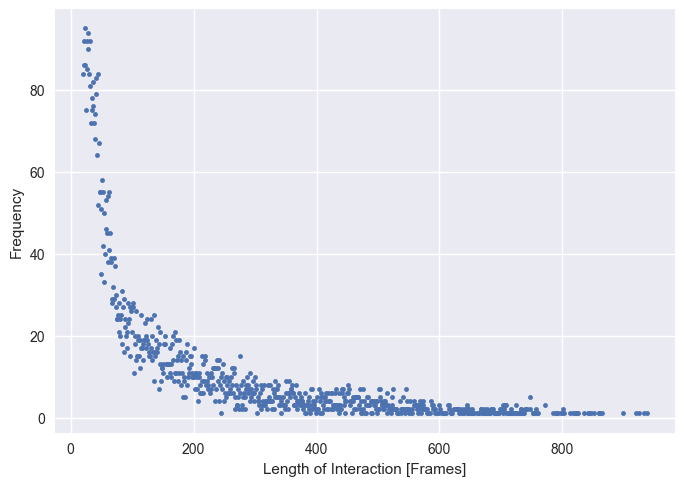

PyObject <matplotlib.text.Text object at 0x00000000026836A0>

In [15]:
hacky_counter = Dict{Int, Int}()

for r in values(pair_traj)
    d = r[2] - r[1] + 1
    hacky_counter[d] = get(hacky_counter, d, 0) + 1
end

lens = collect(keys(hacky_counter))
counts = collect(values(hacky_counter))

plot(lens, counts, ".")
xlabel("Length of Interaction [Frames]")
ylabel("Frequency")

## Velocities of (Supposedly) Interacting Cars

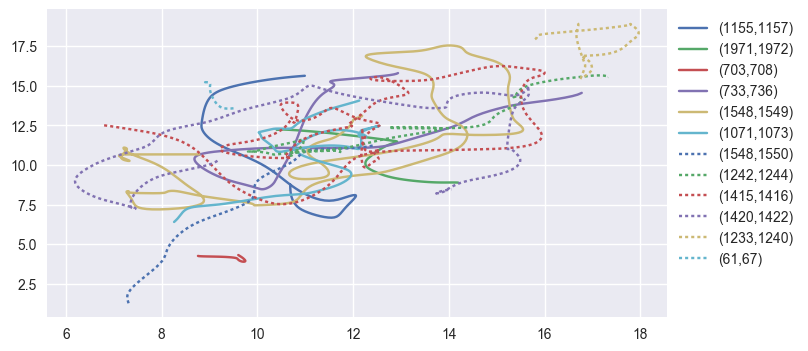

PyObject <matplotlib.legend.Legend object at 0x0000000000F98208>

In [16]:
fig = figure(figsize=(8, 4))
ax = fig[:gca]()

styles = repeat(["", ":"], inner=6)

for (i, ((ci, cj), (start_frame, end_frame))) in take(drop(pair_traj, rand(1:100)), 12) |> enumerate
    pt = full(S[start_frame:end_frame, [ci, cj]])
    vs = map(s -> s.v, pt)

    ax[:plot](vs[:, 1], vs[:, 2], styles[i], label=repr((ci, cj)))
end
ax[:legend](loc=2, bbox_to_anchor=(1,1))

## Velocities of Random Cars

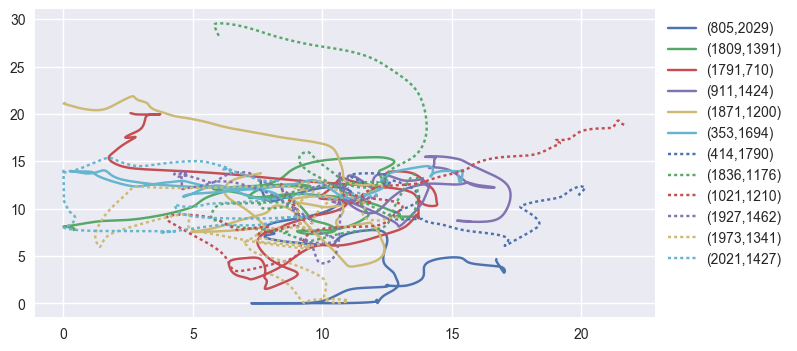

PyObject <matplotlib.legend.Legend object at 0x00000000010C19B0>

In [17]:
fig = figure(figsize=(8, 4))
ax = fig[:gca]()

styles = repeat(["", ":"], inner=6)

idxs_i = rand(1:S.n, length(styles))
idxs_j = rand(1:S.n, length(styles))

for (k, (i, j)) in zip(idxs_i, idxs_j) |> enumerate
    vs_i = map(s -> s.v, S.nzval[nzrange(S, i)])
    vs_j = map(s -> s.v, S.nzval[nzrange(S, j)])
    
    len = minimum(map(length, [vs_i, vs_j]))

    ax[:plot](vs_i[1:len], vs_j[1:len], styles[k], label=repr((i, j)))
end

ax[:legend](loc=2, bbox_to_anchor=(1,1))

In [18]:
((ci, cj), (start_frame, end_frame)) = first(drop(pair_traj, rand(1:length(pair_traj))))

pt = full(S[start_frame:end_frame, [ci, cj]])
vs = map(s -> s.v, pt)
xs = map(s -> s.posG.x, pt)
ys = map(s -> s.posG.y, pt)
;

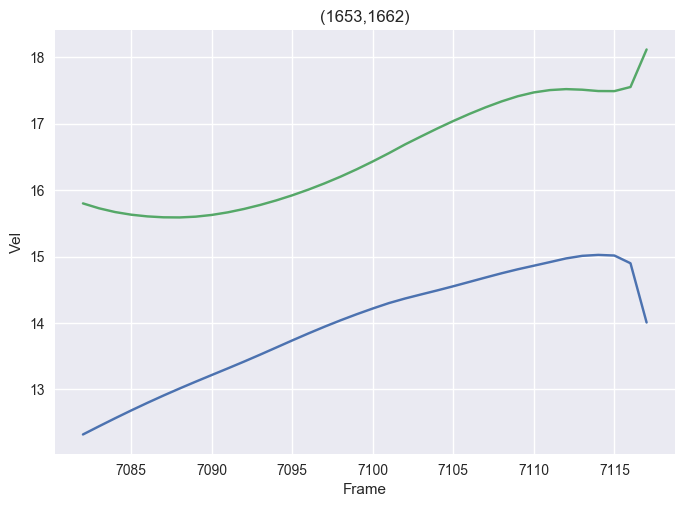

In [19]:
plot(start_frame:end_frame, vs[:, 1])
plot(start_frame:end_frame, vs[:, 2])
title(repr((ci, cj)))
xlabel("Frame")
ylabel("Vel")

savefig("src/img/$(ci)_$(cj)_vel.png")

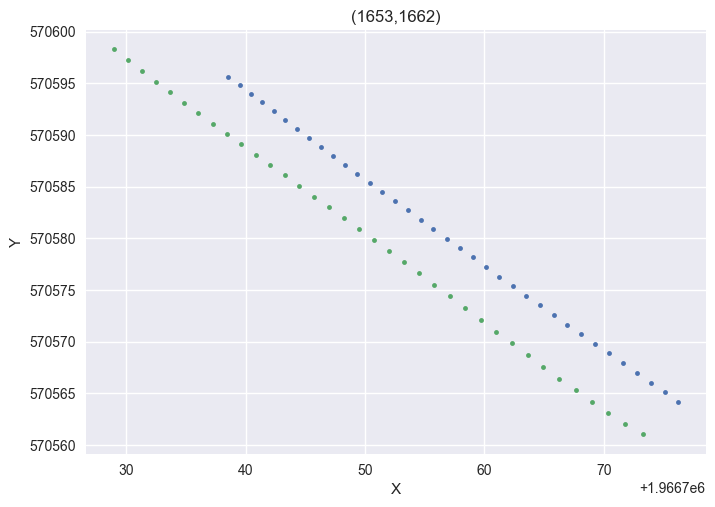

In [20]:
plot(xs[:, 1], ys[:, 1], ".", xs[:, 2], ys[:,2], ".")
title(repr((ci, cj)))
xlabel("X")
ylabel("Y")

savefig("src/img/$(ci)_$(cj)_xy.png")

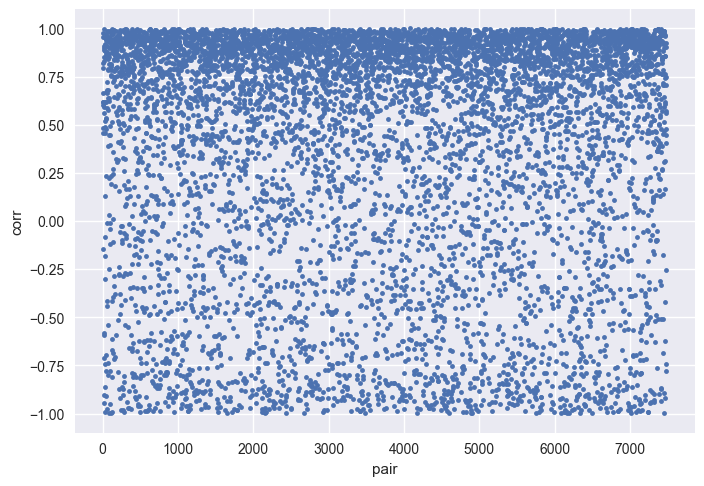

PyObject <matplotlib.text.Text object at 0x00000000013B90F0>

In [22]:
corrs = Vector(length(pair_traj))

for (i, ((ci, cj), (start_frame, end_frame))) in enumerate(pair_traj)
    pt = full(S[start_frame:end_frame, [ci, cj]])
    vs = map(s -> s.v, pt)
    corrs[i] = cor(vs[:, 1], vs[:, 2])
end

plot(corrs, ".")
xlabel("pair")
ylabel("corr")